In [151]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
path='/content/gdrive/My Drive/Card-recommend/샘플데이터'
os.listdir(path)

['내국인(블록)_일자별시간대별.csv',
 '내국인(집계구)_성별연령대별.csv',
 '내국인(집계구)_유입지별.csv',
 '신한카드_내국인_63업종_코드.csv',
 '신한카드_외국인_56업종_코드.csv',
 '외국인관광(블록)_일자별시간대별.csv',
 '외국인관광객(집계구)_국가별.csv',
 '~$내국인(집계구)_성별연령대별.csv']

In [135]:
ageSexDf=pd.read_csv(os.path.join(path, '내국인(집계구)_성별연령대별.csv'), encoding='utf-8')
ageSexDf.head()

,TOT_REG_CD(가맹점집계구코드),SB_UPJONG_CD(내국인업종코드),TS_YM(기준년월),TS_YMD(일별),PSN_CPR(개인법인구분),SEX_CCD(성별),AGE_GB(연령대별),AMT_CORR(카드이용금액계),USECT_CORR(카드이용건수)
0,1101053010006,SB001,201812,20181201,개인,F,20대,9999,9999.999
1,1101053010006,SB001,201812,20181201,개인,F,30대,9999,9999.999
2,1101053010006,SB001,201812,20181201,개인,F,40대,9999,9999.999
3,1101053010006,SB001,201812,20181201,개인,F,50대,9999,9999.999
4,1101053010006,SB001,201812,20181201,개인,M,20대,9999,9999.999


In [136]:
sectorCodeDf=pd.read_csv(os.path.join(path, '신한카드_내국인_63업종_코드.csv'), encoding='utf-8')
sectorCodeDf['SB_UPJONG_CD(내국인업종코드)'] = sectorCodeDf['SB_UPJONG_CD(내국인업종코드)'].str.upper()
sectorCodeDf.head()

,SB_L_UPJONG_NM(대분류_13분류),SB_M_UPJONG_NM(중분류_30분류),SB_UPJONG_NM(소분류_63분류),SB_UPJONG_CD(내국인업종코드)
0,요식/유흥,한식,한식,SB001
1,요식/유흥,일식/중식/양식,일식,SB002
2,요식/유흥,일식/중식/양식,양식,SB003
3,요식/유흥,일식/중식/양식,중식,SB004
4,요식/유흥,제과/커피/패스트푸드,제과점,SB005


In [138]:
ageSexDf=pd.merge(ageSexDf, sectorCodeDf, how='left', on='SB_UPJONG_CD(내국인업종코드)')
ageSexDf.head()

,TOT_REG_CD(가맹점집계구코드),SB_UPJONG_CD(내국인업종코드),TS_YM(기준년월),TS_YMD(일별),PSN_CPR(개인법인구분),SEX_CCD(성별),AGE_GB(연령대별),AMT_CORR(카드이용금액계),USECT_CORR(카드이용건수),SB_L_UPJONG_NM(대분류_13분류),SB_M_UPJONG_NM(중분류_30분류),SB_UPJONG_NM(소분류_63분류)
0,1101053010006,SB001,201812,20181201,개인,F,20대,9999,9999.999,요식/유흥,한식,한식
1,1101053010006,SB001,201812,20181201,개인,F,30대,9999,9999.999,요식/유흥,한식,한식
2,1101053010006,SB001,201812,20181201,개인,F,40대,9999,9999.999,요식/유흥,한식,한식
3,1101053010006,SB001,201812,20181201,개인,F,50대,9999,9999.999,요식/유흥,한식,한식
4,1101053010006,SB001,201812,20181201,개인,M,20대,9999,9999.999,요식/유흥,한식,한식


In [140]:
sexDf=ageSexDf.pivot_table(index=['SEX_CCD(성별)','SB_L_UPJONG_NM(대분류_13분류)'],values=['AMT_CORR(카드이용금액계)','USECT_CORR(카드이용건수)'],aggfunc='sum')
sexDf

AMT_CORR(카드이용금액계)  USECT_CORR(카드이용건수)
SEX_CCD(성별) SB_L_UPJONG_NM(대분류_13분류)                                       
F           가전/가구                                499950          499999.950
            가정생활/서비스                              89991           89999.991
            교육/학원                                229977          229999.977
            미용                                    39996           39999.996
            스포츠/문화/레저                            759924          759999.924
            요식/유흥                               6149385         6149999.385
            유통                                  4449555         4449999.555
            음/식료품                               2559744         2559999.744
            의료                                  3219678         3219999.678
            의류/잡화                                399960          399999.960
            자동차                                  159984          159999.984
M           가전/가구                                459954          459999.954
            가정생활/서비스                             129987          129999.987
            교육/학원                                389961          389999.961
            미용                                    79992           79999.992
            스포츠/문화/레저                           1349865         1349999.865
            여행/교통                                  9999            9999.999
            요식/유흥                               6629337         6629999.337
            유통                                  6159384         6159999.384
            음/식료품                               2359764         2359999.764
            의료                                  3339666         3339999.666
            의류/잡화                                239976          239999.976
            자동차                                  429957          429999.957

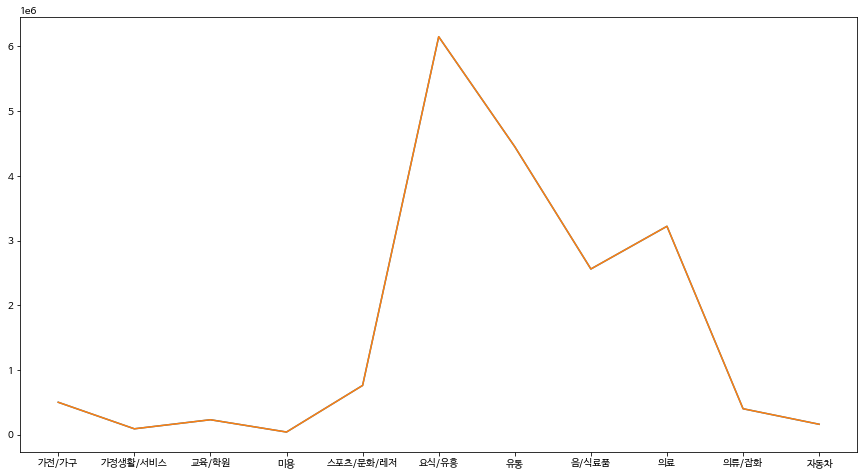

In [141]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15,8))
plt.plot(sexDf.xs('F',axis=0))

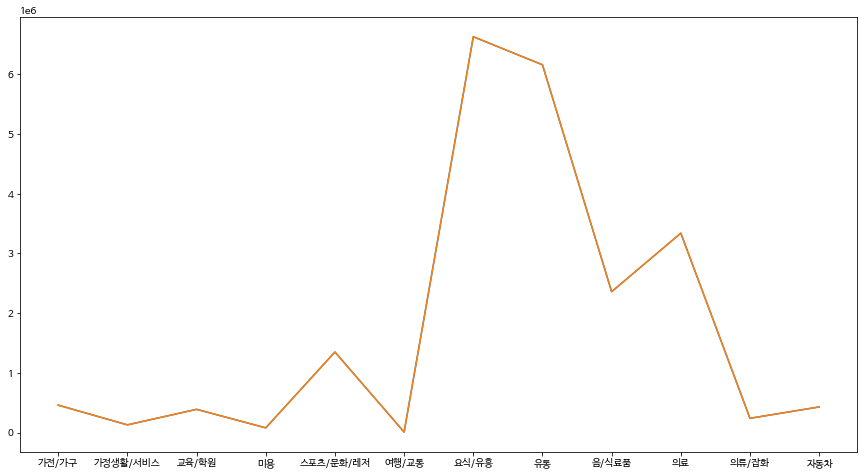

In [143]:
plt.figure(figsize=(15,8))
plt.plot(sexDf.xs('M',axis=0))

In [16]:
ageDf=ageSexDf.pivot_table(index=['AGE_GB(연령대별)','SB_L_UPJONG_NM(대분류_13분류)'],values=['AMT_CORR(카드이용금액계)','USECT_CORR(카드이용건수)'],aggfunc='sum')
ageDf

AMT_CORR(카드이용금액계)  USECT_CORR(카드이용건수)
AGE_GB(연령대별) SB_L_UPJONG_NM(대분류_13분류)                                       
10대          교육/학원                                  9999            9999.999
             스포츠/문화/레저                             19998           19999.998
             요식/유흥                                329967          329999.967
             유통                                   539946          539999.946
             음/식료품                                229977          229999.977
...                                                  ...                 ...
70대이상        유통                                   569943          569999.943
             음/식료품                                 89991           89999.991
             의료                                   529947          529999.947
             의류/잡화                                  9999            9999.999
             자동차                                    9999            9999.999

[70 rows x 2 columns]

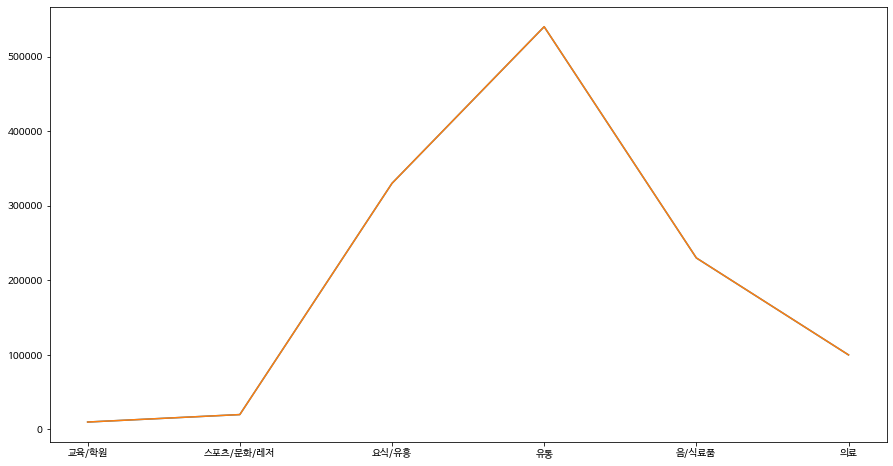

In [144]:
plt.figure(figsize=(15,8))
plt.plot(ageDf.xs('10대',axis=0))

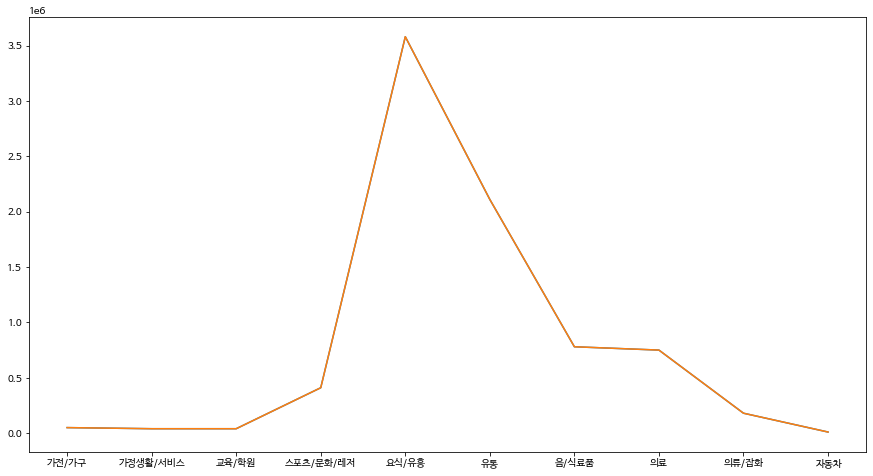

In [145]:
plt.figure(figsize=(15,8))
plt.plot(ageDf.xs('20대',axis=0))

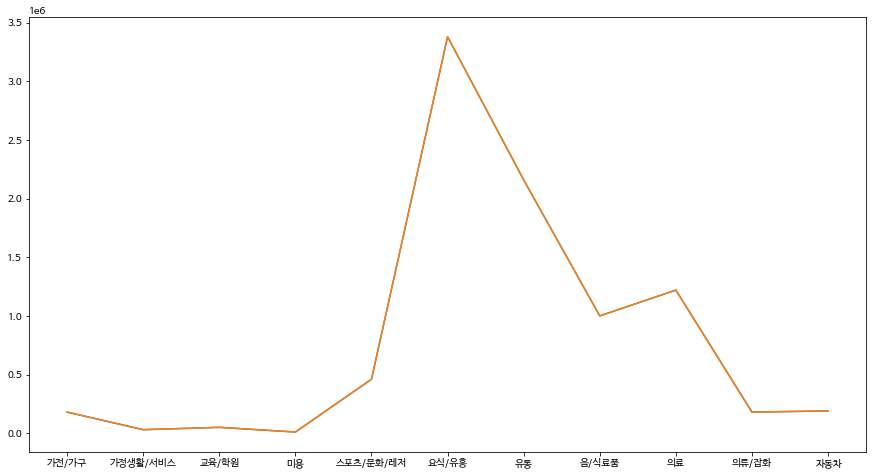

In [146]:
plt.figure(figsize=(15,8))
plt.plot(ageDf.xs('30대',axis=0))

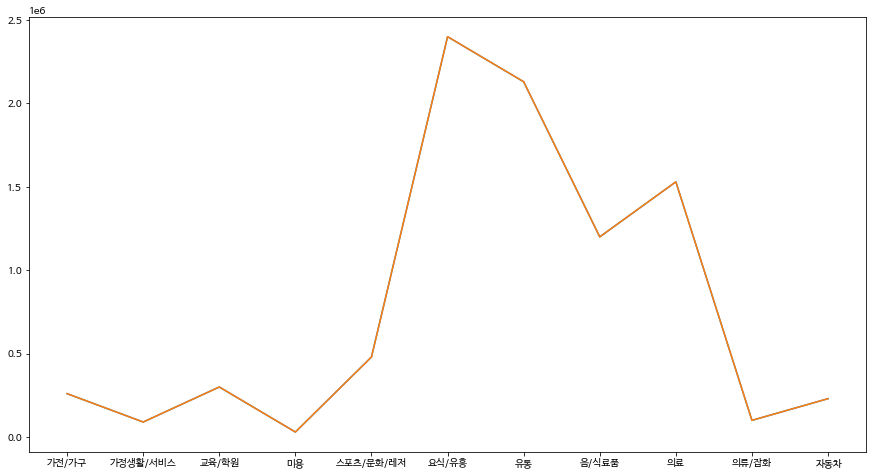

In [147]:
plt.figure(figsize=(15,8))
plt.plot(ageDf.xs('40대',axis=0))

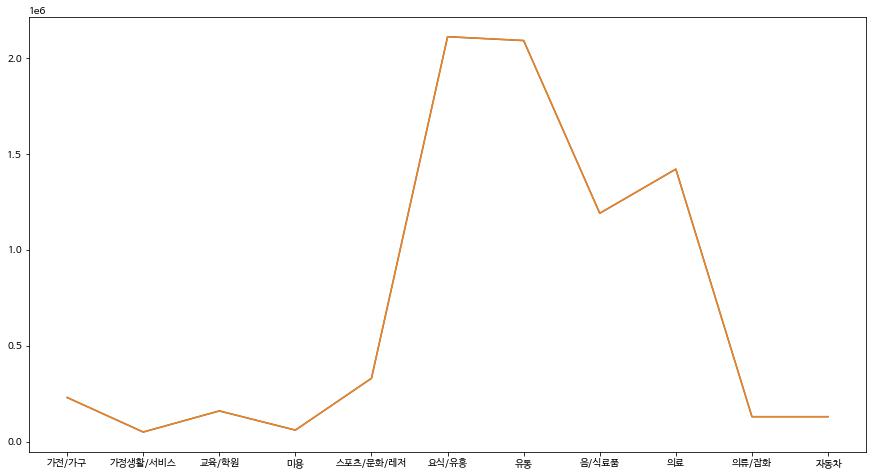

In [148]:
plt.figure(figsize=(15,8))
plt.plot(ageDf.xs('50대',axis=0))

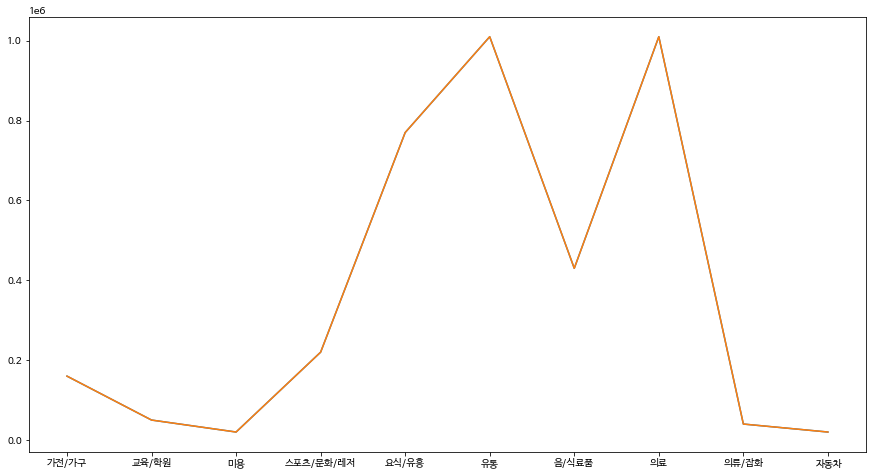

In [149]:
plt.figure(figsize=(15,8))
plt.plot(ageDf.xs('60대',axis=0))

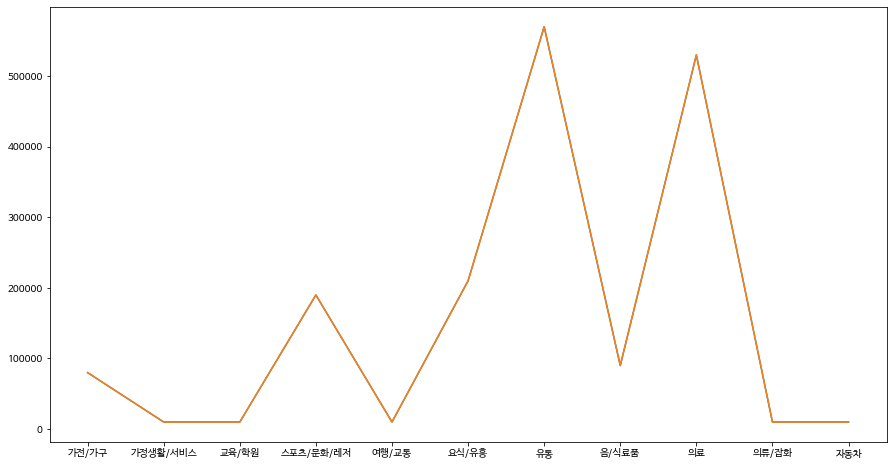

In [150]:
plt.figure(figsize=(15,8))
plt.plot(ageDf.xs('70대이상',axis=0))